# Cài đặt mô hình tạo hình ảnh từ văn bản

- Cài đặt thư viện

In [6]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s

- Thêm thư viện

In [1]:
from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

c:\Users\Asus\miniconda3\envs\cuda_test\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Sử dụng mô hình từ `Hugging Face`

1. Mô hình đơn giản: 1 mô hình `stable-diffusion-xl-base-1.0` chuyển từ văn bản sang hình ảnh

In [2]:
pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
)
pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]c:\Users\Asus\miniconda3\envs\cuda_test\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--runwayml--stable-diffusion-v1-5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 15 files:  20%|██        | 3/

KeyboardInterrupt: 

- 2. Mô hình phức tạp: kết hợp 2 mô hình (Chỉ sử dụng được vài lần trên Google Collab do giới hạn GPU)

In [ ]:
# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

3. Mô hình tạo ra hình ảnh với tốc độ nhanh (thích hợp chạy trên máy local)

In [3]:
import torch

from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("amused/amused-512", variant="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "cowboy"
image = pipe(prompt, generator=torch.Generator('cuda').manual_seed(8)).images[0]
image.save('text2image_512.png')


c:\Users\Asus\miniconda3\envs\cuda_test\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Asus\.cache\huggingface\hub\models--amused--amused-512. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 12 files:  33%|███▎      | 4/12 [00:47<01:50, 13.83s/it]

- Mô tả văn bản để tạo ra hình ảnh (tạo `prompt`) và tuỳ chỉnh vài thông số của mô hình

In [4]:
n_steps = 40
high_noise_frac = 0.8

prompt = 'Phone on a table'

- Tạo ra hình ảnh từ đoạn văn bản (prompt) trên

1. Tạo ra hình ảnh từ mô hình đơn giản

In [8]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [01:32<?, ?it/s]


KeyboardInterrupt: 

2. Tạo ra hình ảnh từ mô hình phức tạp

In [ ]:
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
    # num_images_per_prompt=num_images_per_prompt
).images
image = refiner(
    prompt=prompt,
    # num_images_per_prompt=num_images_per_prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]

- Hiển thị hình ảnh được tạo ra từ mô hình

[PROMPT]:  Phone on a table


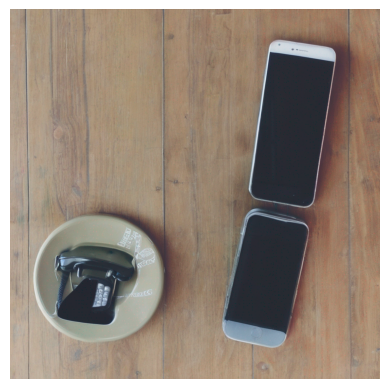

In [6]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

# Cài đặt `Google Collab` cho `streamlit`

- Cài đặt thư viện

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


- Tạo ra file `app.py`

In [3]:
%%writefile app.py

Writing app.py


In [4]:
! wget -q -O - ipv4.icanhazip.com

34.126.171.190


- Copy the above url and click on `your url is...` below. It will open a new website. Pass **above url** to the input section and click on **submit**.

- Khi hoàn thành, mở file `app.py` và ghi câu lệnh cơ bản sau, sau đó lưu file:

```python
import streamlit as st

st.write('Hello from Google Collab')
```

=> Nếu cài đặt thành công thì bên trang web **nhấn refresh lại** sẽ xuất hiện dòng chữ `Hello from Google Collab`

In [7]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.126.171.190:8501

npx: installed 22 in 2.289s
your url is: https://pink-tires-punch.loca.lt
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
model_index.json: 100% 609/609 [00:00<00:00, 2.82MB/s]
2024-04-27 11:02:31.821392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 11:02:31.821450: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 11:02:31.822887: E external/local_xla/xla/stre

# Thiết kế giao diện cho app bằng `streamlit`

- Paste đoạn code bên dưới vào file `app.py`

In [ ]:
import streamlit as st
from PIL import Image
# import tensorflow as tf
import numpy as np
import io
from diffusers import DiffusionPipeline
import torch

# Function to generate images based on user input
def generate_images(text, size, num_images, quality):
    # Placeholder function, replace with your actual implementation
    generated_images = []
    for _ in range(num_images):
        # Use your model to generate an image based on the input text
        # Example:
        # image = model.generate_image(text, size, quality)
        # generated_images.append(image)
        pass
    return generated_images

# Function to convert PIL image to bytes
def pil_to_bytes(image):
    img_byte_array = io.BytesIO()
    image.save(img_byte_array, format='PNG')
    return img_byte_array.getvalue()

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe = pipe.to("cuda")

# Streamlit interface
st.title('Text-to-Image AI-based Chatbot')

# Text input box
user_input = st.text_input("Enter your text here:")

# Image size input
image_size_options = ["1080x1080", "1280x720", "1920x1080"]
selected_size = st.selectbox("Select image size:", image_size_options)

# Convert selected size to width and height
width, height = map(int, selected_size.split('x'))

# Number of images input
num_images = st.number_input("Number of images to generate:", min_value=1, max_value=10, value=3, step=1)

# Image quality input
image_quality = st.slider("Select image quality:", min_value=1, max_value=100, value=80, step=5)

# Generate button
if st.button("Generate Images"):
    if user_input:
        # Example image
        # example_image = Image.open("example_img.jpg")
        # st.image(example_image, caption='Example Image', use_column_width=True)
        # img_bytes = pil_to_bytes(example_image)
        # st.download_button(label=f"Download Image ", data=img_bytes, file_name=f"generated_image_example.png", mime='image/png')

        image = pipe(user_input).images[0]
        st.image(image, caption='Example Image', use_column_width=True)
        img_bytes = pil_to_bytes(image)
        st.download_button(label=f"Download Image ", data=img_bytes, file_name=f"generated_image_example.png", mime='image/png')

        # # Generate images based on user input
        # generated_images = generate_images(user_input, (width, height), num_images, image_quality)
        # if generated_images:
        #     for i, img in enumerate(generated_images):
        #         st.image(img, caption=f"Generated Image {i+1}", use_column_width=True)
        #         # Download link for each image
        #         img_bytes = pil_to_bytes(img)
        #         st.download_button(label=f"Download Image {i+1}", data=img_bytes, file_name=f"generated_image_{i+1}.png", mime='image/png')
        # else:
        #     st.error("Failed to generate images.")
    else:
        st.warning("Please enter some text.")

# Tham khảo

1. Mô hình: https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0